# 데이터 시각화 연습문제(1)


## 문제 1

이 데이터를 활용하여 날짜별 종가와 시가가 어떻게 변화하고 있는지 보여주고자 한다. 단, x축의 간격을 10일 간격으로 설정하여 구현하시오.

In [28]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np


In [29]:

# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'   # 윈도우 전용
#plt.rcParams['font.family'] = 'AppleGothic'    # 맥 전용
plt.rcParams["font.size"] = 12

# 그래프 크기 설정
plt.rcParams["figure.figsize"] = (7, 4)

# 유니코드에서 음수 부호설정
plt.rcParams['axes.unicode_minus'] = False


In [105]:
## 데이터 불러오기 
df = pd.read_excel("https://data.hossam.kr/bitcoin.xlsx")

## 10일간격으로 데이터 끊기 + 잘라내기
bet = np.array(range(0,len(df),10))

x_data =df['날짜'].iloc[bet]


x=np.array(range(0,len(x_data)))
x_data
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75])

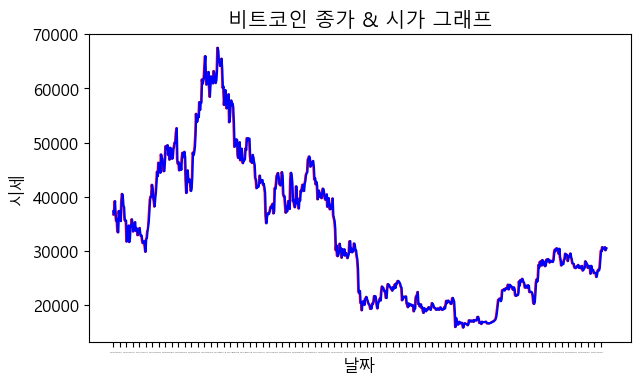

In [106]:
## 그래프 그리기
y1 = df['종가']
y2 = df['시가']
x= df['날짜']
plt.figure()                   
plt.title("비트코인 종가 & 시가 그래프")           
plt.plot(x,y1,color = "red")   ## 종가
plt.plot(x,y2,color = "blue")  ## 시가 

plt.xlabel("날짜")                 
plt.ylabel("시세")    
plt.xticks(x_data)
plt.rc("xtick",labelsize = 1)           
plt.show()   

plt.close()

# 문제2

복지시설이 많은 상위 10개 지역에 대한 지역별 복지 시설 수를 시각화 하시오.

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

## 데이터 불러오기 

df = pd.read_excel("https://data.hossam.kr/senior_lsf.xlsx")
## 데이터 정렬
df = df.sort_values('복지시설',ascending=False)
top10 = df.head(10)
top10

y = top10['복지시설']
x = top10['지역명']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


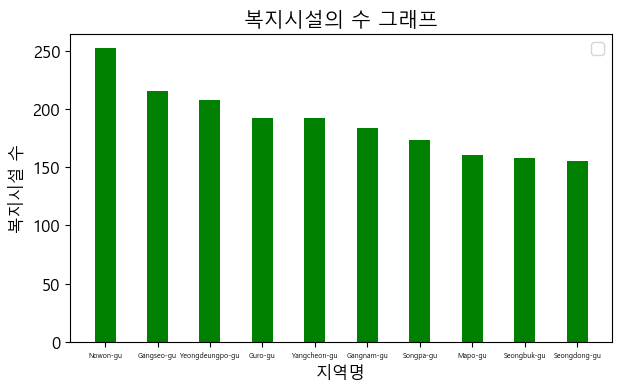

In [26]:
## 그래프 그리기 

plt.figure()
plt.title("복지시설의 수 그래프")

plt.bar(x,y,color="green",width=0.4)
plt.xlabel("지역명")
plt.ylabel("복지시설 수")
plt.rc("xtick",labelsize = 10)
plt.show()
plt.close()


# 문제3

각 도시별로 2015년도의 2010년도의 인구수를 비교하는 자료를 시각화 하시오.

단, 인구수의 표현 범위는 200만~1000만으로 한다


In [32]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'   # 윈도우 전용
#plt.rcParams['font.family'] = 'AppleGothic'    # 맥 전용
plt.rcParams["font.size"] = 12

# 그래프 크기 설정
plt.rcParams["figure.figsize"] = (7, 4)

# 유니코드에서 음수 부호설정
plt.rcParams['axes.unicode_minus'] = False

## 데이터 불러오기 

df = pd.read_excel("https://data.hossam.kr/city_people.xlsx")


In [35]:
## 데이터 정제 
df.dtypes
df=df[df['연도']>=2010]
df

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
6,인천,2015,2890451,수도권
7,인천,2010,2632035,수도권


In [53]:
# x축에 표시할 텍스트

xlabels=list(["서울","부산","인천"])
xlabels
## x축 좌표

x= np.array(range(0,len(xlabels)))


In [50]:
#y축 좌표 

y1=df[df['연도']==2015]['인구']
y2=df[df['연도']==2010]['인구']

y_ticks =[]
y_values=list(range(2000000,10000001,1000000))

for i in y_values:
    y_ticks.append("%d만" % (i/10000))
y_ticks


['200만', '300만', '400만', '500만', '600만', '700만', '800만', '900만', '1000만']

### 그래프 그리기

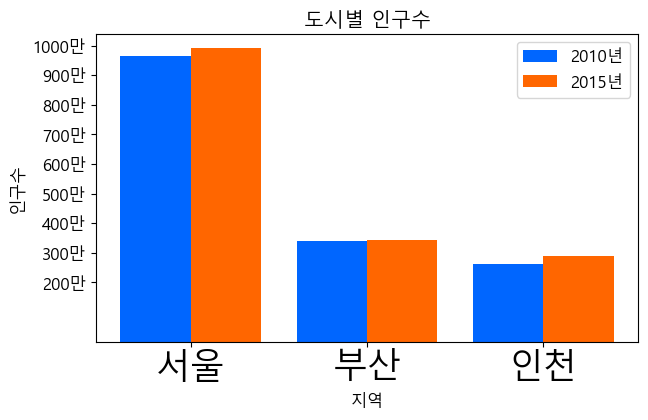

In [60]:
plt.figure()
plt.title("도시별 인구수")

plt.bar(x-0.2,y2,color='#0066ff',label = "2010년",width=0.4)
plt.bar(x+0.2,y1,color='#ff6600',label = "2015년",width=0.4)

plt.xlabel("지역")
plt.ylabel("인구수")
plt.legend()
plt.xticks(x,xlabels)
plt.rc("xtick",labelsize=20)
plt.yticks(y_values,y_ticks)
plt.show()
plt.close()



# 문제4

다음 데이터는 종사자 규모별 업체수를 2015년과 2016년도에 걸쳐 조사한 데이터이다.

이 데이터에 대해 아래의 요구사항을 충족하는 시각화 결과물을 구현하시오.

In [62]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'   # 윈도우 전용
#plt.rcParams['font.family'] = 'AppleGothic'    # 맥 전용
plt.rcParams["font.size"] = 12

# 그래프 크기 설정
plt.rcParams["figure.figsize"] = (7, 4)

# 유니코드에서 음수 부호설정
plt.rcParams['axes.unicode_minus'] = False

## 데이터 불러오기 

df = pd.read_excel("https://data.hossam.kr/jobs_by_scale.xlsx")

요구사항 1


종사자 규모에 따른 업체 수를 확인할 수 있는 세로 막대 그래프를 구현하시오. 이 때 각 데이터의 범주는 년도로 설정하시오.



In [63]:
df

,종사자규모별,2015,2016
0,1~4명,553.5,576.7
1,5~9명,211.6,216.8
2,10~29명,194.7,195.5
3,30~49명,227.4,227.4
4,50~99명,152.8,155.7
5,100~199명,221.9,220.6
6,200~299명,80.9,81.0
7,300~999명,100.5,99.3
8,1000명 이상,557.6,549.7


In [65]:
## x축에 표시할 텍스트
xlabels=list(df['종사자규모별'])
xlabels
## x축 좌표

x=np.array(range(0,len(xlabels)))




In [67]:
## y축 좌표

y1= df[2015]
y2= df[2016]



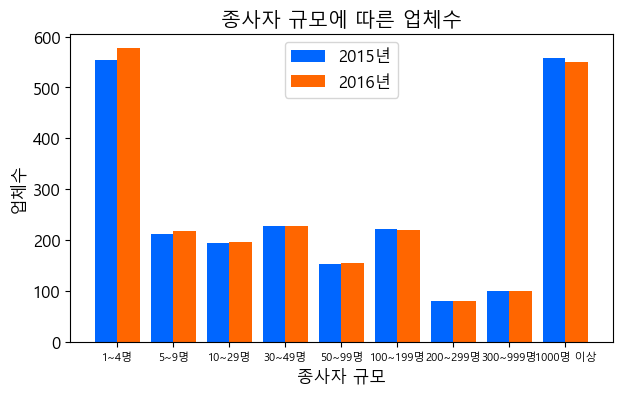

In [79]:
## 그래프 그리기

plt.figure()
plt.title("종사자 규모에 따른 업체수")

plt.bar(x-0.2,y1,color='#0066ff',label = "2015년",width=0.4)
plt.bar(x+0.2,y2,color='#ff6600',label = "2016년",width=0.4)

plt.xlabel("종사자 규모")
plt.ylabel("업체수")
plt.legend()
plt.xticks(x,xlabels)
plt.rc("xtick",labelsize=4)
plt.show()
plt.close()

요구사항 2


종사자 규모별 업체 수의 비율을 시각화 하시오. 2015년도와 2016년도에 대한 시각화 결과물이 각각(총 2개) 구현되어야 합니다.

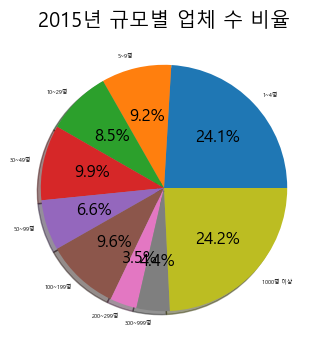

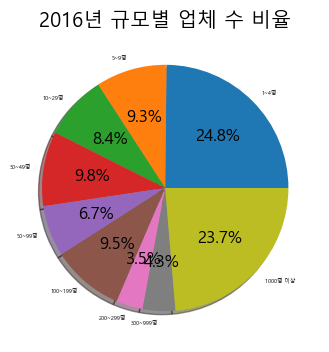

In [92]:
plt.figure()
plt.title("2015년 규모별 업체 수 비율")


## 15년 데이터
## y축 좌표

y1= df[2015]
y2= df[2016]

plt.pie(y1,labels = df['종사자규모별'],autopct='%0.1f%%',shadow=True)
plt.figure()
plt.title("2016년 규모별 업체 수 비율")
plt.pie(y2,labels = df['종사자규모별'],autopct='%0.1f%%',shadow=True)
plt.show()
plt.close()


# 문제 5

교통사고 발생건수와 부상자수의 상관관계를 알아보고자 한다. 적합한 시각화 결과물을 제시하시오.

In [93]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'   # 윈도우 전용
#plt.rcParams['font.family'] = 'AppleGothic'    # 맥 전용
plt.rcParams["font.size"] = 12

# 그래프 크기 설정
plt.rcParams["figure.figsize"] = (7, 4)

# 유니코드에서 음수 부호설정
plt.rcParams['axes.unicode_minus'] = False

## 데이터 불러오기 

df = pd.read_excel("https://data.hossam.kr/traffic_acc.xlsx")

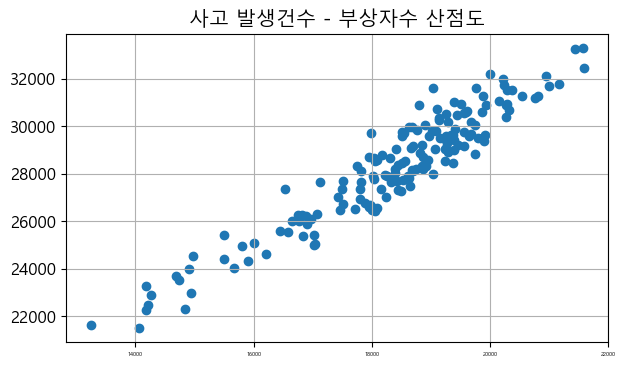

In [96]:
x = df['발생건수']
y = df['부상자수']

plt.figure()
plt.title("사고 발생건수 - 부상자수 산점도")
plt.scatter(x,y)
plt.grid()
plt.show()
plt.close()